* Word2Vec
* Dense Neural Network

In [17]:
from src.features.build_features import get_roast_classification_dataset
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
import numpy as np


In [2]:
X, y = get_roast_classification_dataset()

In [3]:
X = X.to_numpy()
y = y.to_numpy()

# One hot encode the y values
# I plan to have the neural network predict the probability that the sample
# is a part of each class.  So there will be an output node for each class.
y = to_categorical(y, num_classes=6)

In [4]:
# Split into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# validation set
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=25)

### Try the functional API

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [ ]:
VOCAB_SIZE = 2000
max_len = 50
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE, output_mode='int', output_sequence_length=max_len)

In [ ]:
encoder.adapt(X_train)

In [ ]:
X_train[0]

In [ ]:
encoder(X_train[0])

In [ ]:
y_train

In [ ]:

to_categorical(y_train, num_classes=6)

In [ ]:
## Built wrong model

In [ ]:
inputs = Input(shape=(3593,))
x = Dense(units=64, activation='relu')(inputs)
outputs = Dense(6, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
model.summary()

In [ ]:
plot_model(model)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x=X_train, y=y_train, epochs=10,
                    validation_data=(X_validation, y_validation),
                    validation_steps=30)

### Didn't Work

In [5]:
VOCAB_SIZE = 2000
max_len = 50
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE, output_mode='int', output_sequence_length=max_len)

In [6]:
encoder.adapt(X_train)

In [7]:
encoder.get_vocabulary()

['',
 '[UNK]',
 'and',
 'in',
 'the',
 'a',
 'cup',
 'finish',
 'aroma',
 'of',
 'with',
 'chocolate',
 'mouthfeel',
 'sweet',
 'acidity',
 'notes',
 'but',
 'rich',
 'flowers',
 'fruit',
 'syrupy',
 'dark',
 'long',
 'cedar',
 'as',
 'to',
 'sweetly',
 'hint',
 'balanced',
 'richly',
 'structure',
 'crisp',
 'milk',
 'is',
 'tart',
 'lightly',
 'cocoa',
 'flavor',
 'hints',
 'floral',
 'into',
 'gently',
 'complex',
 'pungent',
 'by',
 'orange',
 'resonant',
 'nib',
 'delicate',
 'deep',
 'drying',
 'very',
 'round',
 'juicy',
 'bright',
 'full',
 'deeply',
 'zest',
 'silky',
 'coffee',
 'lemon',
 'sweettoned',
 'small',
 'espresso',
 'short',
 'roasted',
 'dry',
 'almond',
 'that',
 'nut',
 'consolidates',
 'honey',
 'crisply',
 'aromatic',
 'cherry',
 'cacao',
 'carry',
 'evaluated',
 'flavorsaturated',
 'citrus',
 'wood',
 'sweetness',
 'body',
 'freshcut',
 'parts',
 'black',
 'rather',
 'slightly',
 'ken',
 'apricot',
 'tones',
 'lively',
 'caramel',
 'an',
 'this',
 'though',
 '

In [8]:
# Integer encode sample sentence
encoder(X)[3200]

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([936,  81,  10, 155,  39,   2,  89,  15,  38,   9,  36,   2,  43,
        99,  48,   1,  14, 113,  16,  51,  58,  12, 374, 418,   5, 190,
         3,   5,  13,  16,  50,   7,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])>

In [9]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [10]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

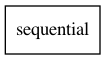

In [12]:
plot_model(model)

In [13]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1)

In [14]:
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=200,
                    validation_data=(X_validation, y_validation),
                    validation_steps=30,
                    callbacks=[es])

Epoch 1/200
113/113 [==============================] - 12s 51ms/step - loss: 1.7503 - accuracy: 0.3336 - val_loss: 1.4715 - val_accuracy: 0.4149
Epoch 2/200
113/113 [==============================] - 4s 34ms/step - loss: 1.4881 - accuracy: 0.3897 - val_loss: 1.3714 - val_accuracy: 0.4138
Epoch 3/200
113/113 [==============================] - 3s 30ms/step - loss: 1.3748 - accuracy: 0.4018 - val_loss: 1.2872 - val_accuracy: 0.4750
Epoch 4/200
113/113 [==============================] - 3s 27ms/step - loss: 1.2352 - accuracy: 0.5051 - val_loss: 1.1687 - val_accuracy: 0.5284
Epoch 5/200
113/113 [==============================] - 3s 31ms/step - loss: 1.1673 - accuracy: 0.5220 - val_loss: 1.1256 - val_accuracy: 0.5317
Epoch 6/200
113/113 [==============================] - 3s 28ms/step - loss: 1.1157 - accuracy: 0.5592 - val_loss: 1.1104 - val_accuracy: 0.5462
Epoch 7/200
113/113 [==============================] - 3s 27ms/step - loss: 1.0313 - accuracy: 0.5991 - val_loss: 1.1185 - val_accuracy

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 50)                0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 64)            128000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 202,694
Trainable params: 202,694
Non-trainable params: 0
_________________________________________________________________


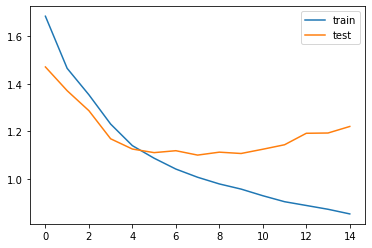

In [18]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

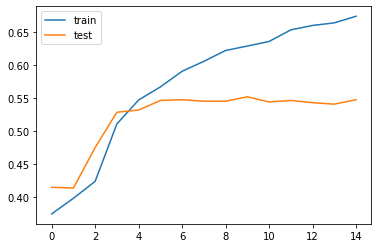

In [19]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

I would imagine that having more data would improve accuracy.  Would a bigger model help?

### Try Batch Normalization

It seems to help a bit.

In [23]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [25]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1)

In [26]:
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=200,
                    validation_data=(X_validation, y_validation),
                    validation_steps=30,
                    callbacks=[es])

Epoch 1/200
113/113 [==============================] - 12s 52ms/step - loss: 1.7606 - accuracy: 0.2613 - val_loss: 1.7533 - val_accuracy: 0.4616
Epoch 2/200
113/113 [==============================] - 3s 28ms/step - loss: 1.5717 - accuracy: 0.4576 - val_loss: 1.6717 - val_accuracy: 0.4972
Epoch 3/200
113/113 [==============================] - 3s 28ms/step - loss: 1.3347 - accuracy: 0.5168 - val_loss: 1.5334 - val_accuracy: 0.5206
Epoch 4/200
113/113 [==============================] - 3s 30ms/step - loss: 1.2221 - accuracy: 0.5588 - val_loss: 1.3643 - val_accuracy: 0.5439
Epoch 5/200
113/113 [==============================] - 3s 31ms/step - loss: 1.0904 - accuracy: 0.6145 - val_loss: 1.2190 - val_accuracy: 0.5473
Epoch 6/200
113/113 [==============================] - 4s 37ms/step - loss: 1.0299 - accuracy: 0.6068 - val_loss: 1.1575 - val_accuracy: 0.5528
Epoch 7/200
113/113 [==============================] - 4s 34ms/step - loss: 0.9362 - accuracy: 0.6615 - val_loss: 1.1593 - val_accuracy

In [ ]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

### Try Dropout

It doesn't provide much benefit over batch normalization.

In [28]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [30]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1)

In [31]:
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=200,
                    validation_data=(X_validation, y_validation),
                    validation_steps=30,
                    callbacks=[es])

Epoch 1/200
113/113 [==============================] - 12s 58ms/step - loss: 1.7880 - accuracy: 0.2041 - val_loss: 1.7548 - val_accuracy: 0.4405
Epoch 2/200
113/113 [==============================] - 4s 34ms/step - loss: 1.6364 - accuracy: 0.3721 - val_loss: 1.6972 - val_accuracy: 0.4950
Epoch 3/200
113/113 [==============================] - 3s 30ms/step - loss: 1.4663 - accuracy: 0.4633 - val_loss: 1.5777 - val_accuracy: 0.5017
Epoch 4/200
113/113 [==============================] - 3s 30ms/step - loss: 1.3293 - accuracy: 0.5049 - val_loss: 1.4352 - val_accuracy: 0.5261
Epoch 5/200
113/113 [==============================] - 3s 31ms/step - loss: 1.2501 - accuracy: 0.5487 - val_loss: 1.2919 - val_accuracy: 0.5484
Epoch 6/200
113/113 [==============================] - 3s 28ms/step - loss: 1.1517 - accuracy: 0.5871 - val_loss: 1.1935 - val_accuracy: 0.5562
Epoch 7/200
113/113 [==============================] - 4s 31ms/step - loss: 1.1360 - accuracy: 0.5883 - val_loss: 1.1659 - val_accuracy

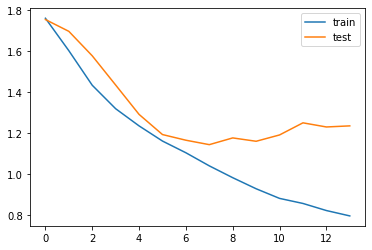

In [32]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

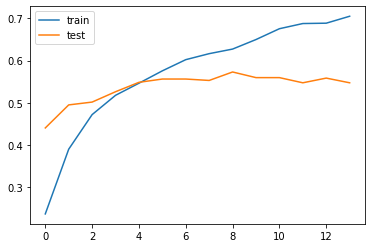

In [33]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
## TODO - re-create the model with the functional API